# XGBoost - Census Income (Classification)
[ch1-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch1-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
df_census = pd.read_csv('census_income_cleaned.csv')

df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df_census['income_ >50K'].value_counts()

0    24719
1     7841
Name: income_ >50K, dtype: int64

In [6]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   age                                         32560 non-null  int64
 1   fnlwgt                                      32560 non-null  int64
 2   education-num                               32560 non-null  int64
 3   capital-gain                                32560 non-null  int64
 4   capital-loss                                32560 non-null  int64
 5   hours-per-week                              32560 non-null  int64
 6   workclass_ ?                                32560 non-null  int64
 7   workclass_ Federal-gov                      32560 non-null  int64
 8   workclass_ Local-gov                        32560 non-null  int64
 9   workclass_ Never-worked                     32560 non-null  int64
 10  workclass_ Private                

In [7]:
df_census.isna().sum().sum()

0

## Define Feature and Target

In [8]:
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

## Classification Model Selection

In [9]:
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=kfold)
    # scores = cross_val_score(model, X, y, scoring='recall', cv=kfold)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('Accuracy:', np.round(scores, 2))
    print('Avg. Accuracy: %0.2f' % (scores.mean()))

In [10]:
cross_validation(XGBClassifier(booster='gbtree'))  # default

[01:17:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [11]:
cross_validation(XGBClassifier(booster='gblinear'))

[01:17:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [12]:
cross_validation(XGBClassifier(booster='dart', one_drop=1))

[01:17:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:17:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [13]:
from sklearn.ensemble import RandomForestClassifier

cross_validation(RandomForestClassifier())

Cross Validation:
Elased time: 14.00s
Accuracy: [0.85 0.85 0.86 0.86 0.86]
Avg. Accuracy: 0.86


## HPO

### Default

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# define model
model = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

# default model accuacry 
def getAccuracy(model):
    start = time.time()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    default_score = accuracy_score(y_pred, y_test)

    print('Elapsed time: %0.2fs' % (time.time()-start))    
    print('default score: %0.2f' % (default_score))

getAccuracy(model)

Elapsed time: 1.74s
default score: 0.87


In [15]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [16]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBClassifier(booster='gbtree', objective='binary:logistic', 
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_clf = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='accuracy')
    
    rand_clf.fit(X_train, y_train)    
    
    best_model = rand_clf.best_estimator_    
    
    best_params = rand_clf.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_clf.best_score_
    print("best score: {:.3f}".format(best_score))

    # print("rand_clf.cv_results_: ", rand_clf.cv_results_)
    report(rand_clf.cv_results_)
    
    return best_model

In [17]:
import time
start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
        'min_child_weight':[1, 2, 3, 4, 5],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 1, 'colsample_bytree': 0.7}
best score: 0.871
Model with rank: 1
Mean validation score: 0.871 (std: 0.007)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 2, 'learning_rate': 0.4, 'gamma': 1, 'colsample_bytree': 0.7}

Model with rank: 2
Mean validation score: 0.870 (std: 0.007)
Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1, 'colsample_bytree': 0.7}

Model with rank: 3
Mean validation score: 0.870 (std: 0.007)
Parameters: {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 4, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.5}

Model with rank: 4
Mean validation score: 0.870 (std: 0.006)
Parameters: {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.5, 'gamma': 1, 'colsam

In [18]:
best_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'enable_categorical': False,
 'gamma': 1,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.4,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0}

## Evaluation

In [19]:
model = best_model

def model_estimation(model):    
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

    from sklearn.metrics import classification_report
    print('\nClassification Report:')
    print(classification_report(y_true=y_test, y_pred = y_pred))

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy Score: %0.2f' % (accuracy_score(y_test,y_pred)))
    print('Precision Score: %0.2f' % (precision_score(y_test,y_pred)))
    print('Recall Score: %0.2f' % (recall_score(y_test,y_pred)))
    print('F1 Score: %0.2f' % (f1_score(y_test,y_pred)))

cross_validation(model)   
model_estimation(model)    

Cross Validation:
Elased time: 7.69s
Accuracy: [0.87 0.87 0.87 0.88 0.87]
Avg. Accuracy: 0.87

Confusion Matrix:
[[5888  369]
 [ 666 1217]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6257
           1       0.77      0.65      0.70      1883

    accuracy                           0.87      8140
   macro avg       0.83      0.79      0.81      8140
weighted avg       0.87      0.87      0.87      8140

Accuracy Score: 0.87
Precision Score: 0.77
Recall Score: 0.65
F1 Score: 0.70


## Feature Importances

Feature Importances:
[0.02009876 0.003903   0.05745384 0.03572804 0.01595427 0.01613411
 0.         0.00843529 0.00891749 0.         0.00562345 0.00671802
 0.0085993  0.0044006  0.         0.         0.         0.35589662
 0.         0.02965983 0.00198017 0.00442066 0.0093978  0.
 0.         0.00319615 0.05139487 0.01695392 0.00865278 0.00526643
 0.02289678 0.         0.04451122 0.0078376  0.00420397 0.01252417
 0.00496507 0.0866361  0.         0.00539839 0.01163386 0.00584538
 0.02397758 0.00226189 0.00270838 0.00331964 0.00178459 0.01481692
 0.01391045 0.01064017 0.00334576 0.         0.00270284 0.00246423
 0.         0.         0.         0.         0.         0.00190019
 0.         0.00209395 0.         0.         0.         0.
 0.         0.         0.         0.00249544 0.         0.
 0.00129555 0.         0.         0.         0.00919925 0.
 0.         0.         0.00327642 0.00154005 0.         0.00277374
 0.         0.00315796 0.         0.         0.         0.00509702
 0.   

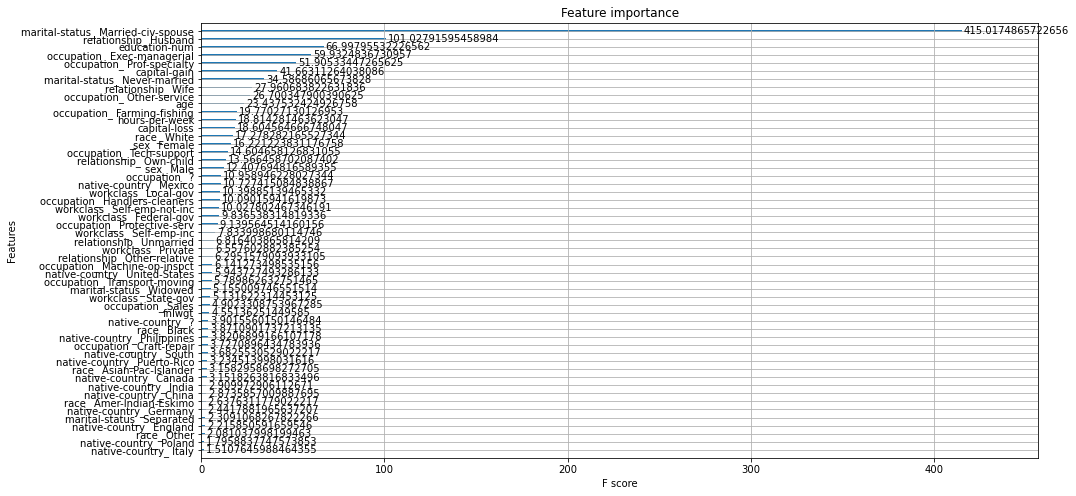

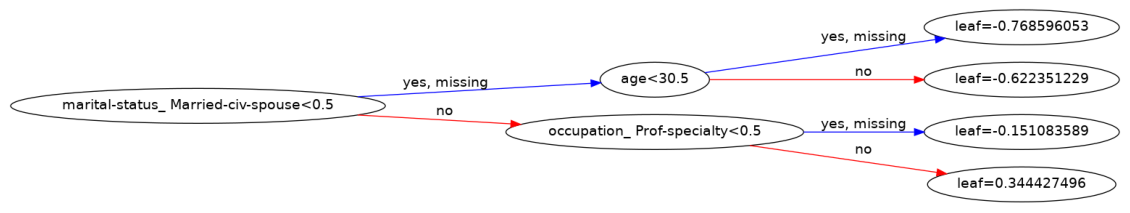

In [20]:
print('Feature Importances:')
print(model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()